In [52]:
from tensorflow import keras

from keras.applications.vgg19 import VGG19
from keras.optimizers import RMSprop
from keras.utils import image_dataset_from_directory

**Batch Size**

A decisão de um *batch size* a 32 foi devido às experiências e treinos anteriores 

In [53]:

IMG_SIZE = 150
num_classes = 10
# Carregar e preparar os dados

train_dir = '../Imagens/train/train5'
validation_dir = '../Imagens/validation'
test_dir = '../Imagens/test'

train_dataset = image_dataset_from_directory(train_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32,label_mode='categorical')
validation_dataset = image_dataset_from_directory(validation_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32,label_mode='categorical')
test_dataset = image_dataset_from_directory(test_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32,label_mode='categorical')

Found 40000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [54]:

from tensorflow import keras
from keras import layers
from keras import layers, regularizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

#Reaproveitamos a classificadora do modelo T, mas sem fine Tunning
model = keras.models.load_model('TL_dataAugmentation.h5')

**Carregar o modelo Pré-Treinado**

- O modelo que escolhemos foi a VGG19, por razões já justificadas anteriormente
- Embora nos testes tenhamos testado descongelar mais do que uma layer, o melhor resultado que obtivemos foi apenas quando descongelamos a primeira, o que explicamos com mais detalhe no relatório

In [55]:
convbase = model.get_layer("vgg19")

for layer in convbase.layers:
    if layer.name in ['block5_conv4']:
        layer.trainable = True
    else:
        layer.trainable = False

for i, layer in enumerate(convbase.layers):
    print(i, layer.name, layer.trainable)



0 input_24 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_conv4 False
11 block3_pool False
12 block4_conv1 False
13 block4_conv2 False
14 block4_conv3 False
15 block4_conv4 False
16 block4_pool False
17 block5_conv1 False
18 block5_conv2 False
19 block5_conv3 False
20 block5_conv4 True
21 block5_pool False


In [56]:
# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)


In [57]:
from keras.utils import to_categorical
from tensorflow import keras
from keras import optimizers
from keras.optimizers import Adam


# Specify the learning rate
learning_rate = 0.00001

# Define the optimizer with the specified learning rate
optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)

# Compile the model with the optimizer and learning rate
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset,callbacks=[reduce_lr, early_stopping, checkpoint])
model.save('Sem_dataAugmentation.h5')

Epoch 1/30
1250/1250 [==============================] - 222s 176ms/step - loss: 0.1990 - accuracy: 0.9430 - val_loss: 0.2768 - val_accuracy: 0.9213
Epoch 2/30
1250/1250 [==============================] - 218s 174ms/step - loss: 0.1888 - accuracy: 0.9464 - val_loss: 0.2762 - val_accuracy: 0.9224
Epoch 3/30
1250/1250 [==============================] - 243s 194ms/step - loss: 0.1818 - accuracy: 0.9508 - val_loss: 0.2772 - val_accuracy: 0.9237
Epoch 4/30
1250/1250 [==============================] - 218s 175ms/step - loss: 0.1827 - accuracy: 0.9490 - val_loss: 0.2783 - val_accuracy: 0.9251
Epoch 5/30
1250/1250 [==============================] - 227s 182ms/step - loss: 0.1788 - accuracy: 0.9503 - val_loss: 0.2773 - val_accuracy: 0.9262
Epoch 6/30
1250/1250 [==============================] - 254s 203ms/step - loss: 0.1757 - accuracy: 0.9529 - val_loss: 0.2784 - val_accuracy: 0.9257
Epoch 7/30
1250/1250 [==============================] - 257s 206ms/step - loss: 0.1698 - accuracy: 0.9525 - val_

In [58]:
val_loss, val_acc = model.evaluate(validation_dataset)
print('val_acc:'
, val_acc)

313/313 [==============================] - 22s 69ms/step - loss: 0.3042 - accuracy: 0.9254
val_acc: 0.9254000186920166


**Análise do gráfico**


- No meu entender, ao olhar para o gráfico vejo que a accuracy do treino está a aumentar levemente, indicando que a rede está a conseguir modelar os dados de treino cada vez melhor ao longo do tempo
- A validação a meu ver, embora esteja a melhorar mostra algumas variações se obsevarmos não segue uma tendência ascendente suave como a linha de treino.
- Para concluir, podemos reparar que a linha de treino e de validação estão próximas no final indicando que no modelo não está a ocorrer um overfitting significativo

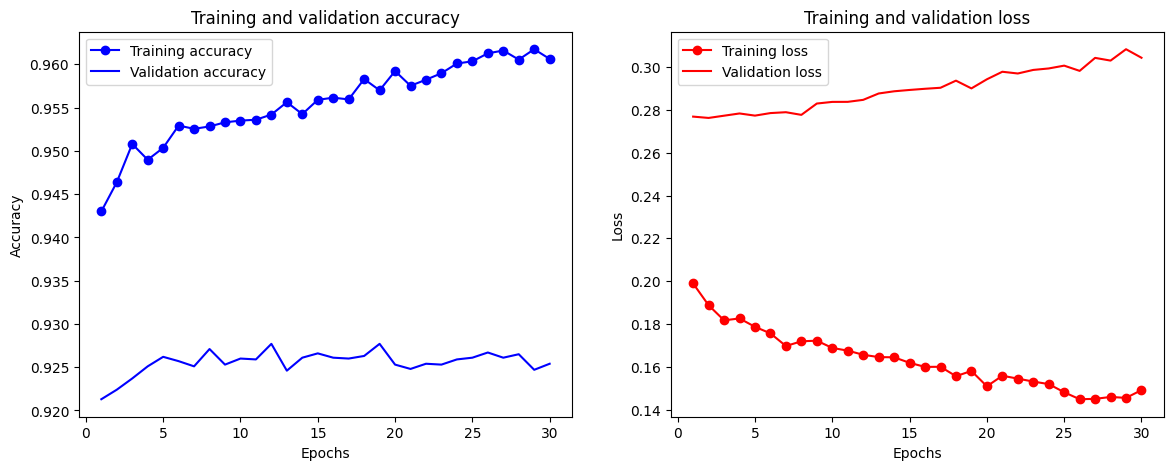

In [59]:
import matplotlib.pyplot as plt

# Avaliar o modelo
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
